In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

import numpy as np
import matplotlib.pyplot as py

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [0]:
def plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b']):
  
    '''
    It is to plot epoch vs Train & Test Loss. 
    
    '''
    py.figure(figsize=(15,5))
    py.title('epoch vs Train & Test Loss')
    py.xlabel('epoch') ; 
    py.ylabel('Categorical Crossentropy Loss')
    py.plot(epochs, test_loss, 'b', label="Test Loss")
    py.plot(epochs, train_loss, 'r', label="Train Loss")
    py.legend()
    py.grid(b=True)
    py.show()

In [56]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


<h3>2 Conv(3,3) + 1 Max pool + 1 Dense + dropout</h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 155us/step - loss: 0.2686 - acc: 0.9175 - val_loss: 0.0577 - val_acc: 0.9819
Epoch 2/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0896 - acc: 0.9735 - val_loss: 0.0462 - val_acc: 0.9850
Epoch 3/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0671 - acc: 0.9797 - val_loss: 0.0371 - val_acc: 0.9869
Epoch 4/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0557 - acc: 0.9838 - val_loss: 0.0313 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0456 - acc: 0.9864 - val_loss: 0.0278 - val_acc: 0.9897
Epoch 6/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0418 - acc: 0.9876 - val_loss: 0.0295 - val_acc: 0.9903
Epoch 7/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0386 - acc: 0.9886 - val_loss: 0.0284 - val_ac

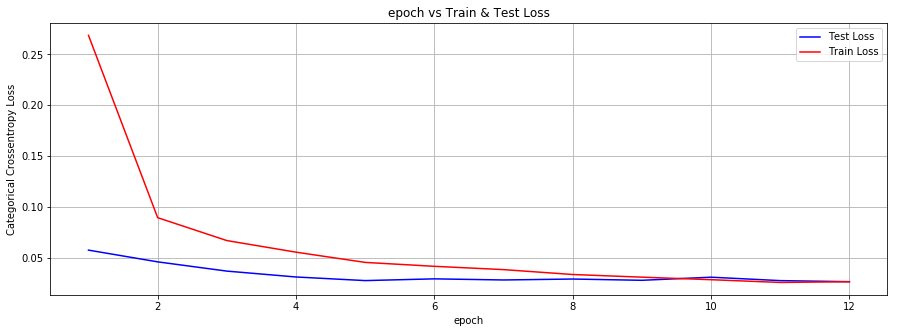

In [74]:
start = datetime.now()

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

print('Time taken to train:',datetime.now()-start)

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),epochs))

total_epochs=list(range(1,epochs+1))
plot_epoch_vs_loss(total_epochs,test_loss,train_loss,colors=['b'])

<h3>2 Conv(3,3) + No Max pool + 1 Dense + dropout</h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.2516 - acc: 0.9237 - val_loss: 0.0625 - val_acc: 0.9805
Epoch 2/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0882 - acc: 0.9741 - val_loss: 0.0408 - val_acc: 0.9863
Epoch 3/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0634 - acc: 0.9811 - val_loss: 0.0396 - val_acc: 0.9863
Epoch 4/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0512 - acc: 0.9847 - val_loss: 0.0339 - val_acc: 0.9895
Epoch 5/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0434 - acc: 0.9869 - val_loss: 0.0317 - val_acc: 0.9892
Epoch 6/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0381 - acc: 0.9884 - val_loss: 0.0314 - val_acc: 0.9892
Epoch 7/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0321 - acc: 0.9904 - val_loss: 0.0298 -

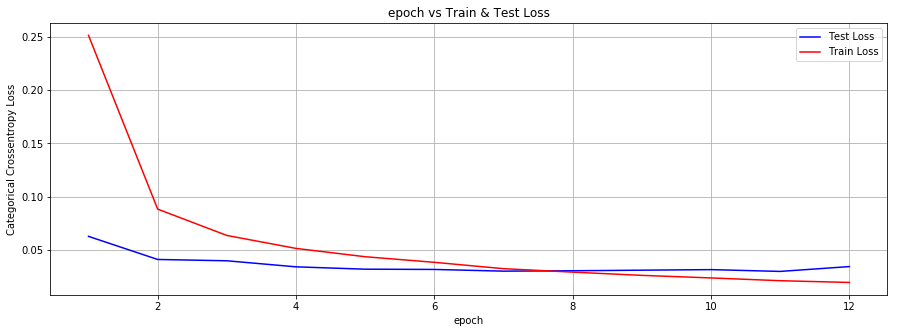

In [76]:
start = datetime.now()

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

print('Time taken to train:',datetime.now()-start)

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),epochs))

total_epochs=list(range(1,epochs+1))
plot_epoch_vs_loss(total_epochs,test_loss,train_loss,colors=['b'])

<h3>3 Conv(5,5) + No Max pool + 1 Dense + dropout</h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 203us/step - loss: 0.2372 - acc: 0.9284 - val_loss: 0.0466 - val_acc: 0.9850
Epoch 2/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.0709 - acc: 0.9796 - val_loss: 0.0294 - val_acc: 0.9907
Epoch 3/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.0481 - acc: 0.9859 - val_loss: 0.0263 - val_acc: 0.9909
Epoch 4/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.0408 - acc: 0.9878 - val_loss: 0.0238 - val_acc: 0.9915
Epoch 5/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.0319 - acc: 0.9905 - val_loss: 0.0225 - val_acc: 0.9930
Epoch 6/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.0270 - acc: 0.9915 - val_loss: 0.0204 - val_acc: 0.9931
Epoch 7/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.0239 - acc: 0.9928 - val_loss: 0.

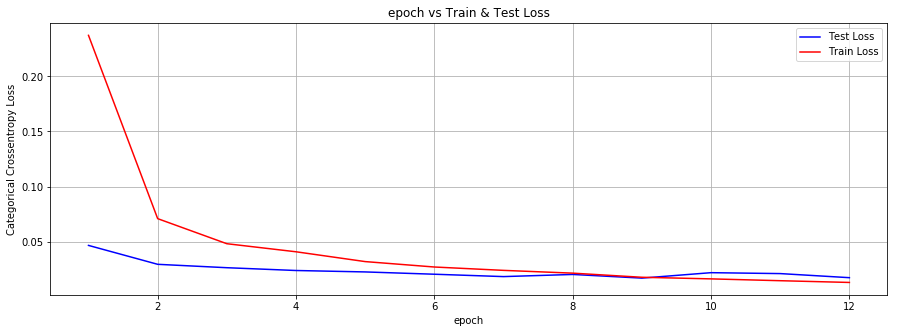

In [57]:
start = datetime.now()

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(128, (5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

print('Time taken to train:',datetime.now()-start)

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),epochs))

total_epochs=list(range(1,epochs+1))
plot_epoch_vs_loss(total_epochs,test_loss,train_loss,colors=['b'])

<h3>3 Conv(5,5) + No Max pool + 1 Dense + dropout , he_normal init, Adam optimizer  </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 209us/step - loss: 0.1706 - acc: 0.9487 - val_loss: 0.0394 - val_acc: 0.9871
Epoch 2/12
60000/60000 [==============================] - 9s 155us/step - loss: 0.0627 - acc: 0.9823 - val_loss: 0.0281 - val_acc: 0.9909
Epoch 3/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.0455 - acc: 0.9861 - val_loss: 0.0243 - val_acc: 0.9925
Epoch 4/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.0361 - acc: 0.9891 - val_loss: 0.0224 - val_acc: 0.9930
Epoch 5/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.0305 - acc: 0.9912 - val_loss: 0.0198 - val_acc: 0.9932
Epoch 6/12
60000/60000 [==============================] - 9s 155us/step - loss: 0.0280 - acc: 0.9915 - val_loss: 0.0266 - val_acc: 0.9921
Epoch 7/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0251 - acc: 0.9923 - val_loss: 0.0262 -

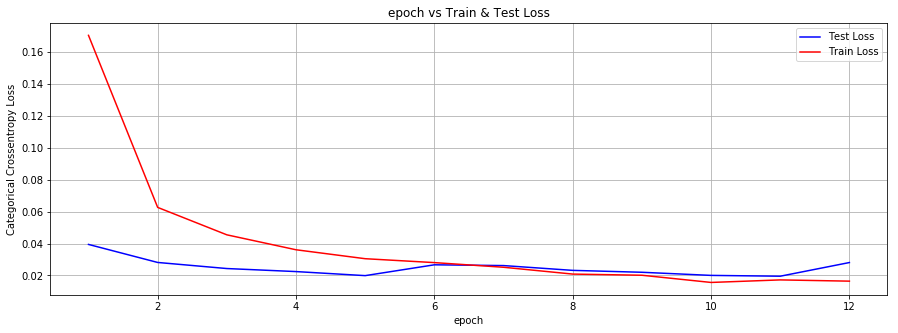

In [64]:
start = datetime.now()

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',
                 kernel_initializer='he_normal',input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(128, (5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

print('Time taken to train:',datetime.now()-start)

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),epochs))

total_epochs=list(range(1,epochs+1))
plot_epoch_vs_loss(total_epochs,test_loss,train_loss,colors=['b'])

<h3>3 Conv(5,5) + 2 Max pool + 1 Dense + dropout</h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 102us/step - loss: 0.2973 - acc: 0.9059 - val_loss: 0.0448 - val_acc: 0.9846
Epoch 2/12
60000/60000 [==============================] - 4s 68us/step - loss: 0.0779 - acc: 0.9772 - val_loss: 0.0276 - val_acc: 0.9908
Epoch 3/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.0550 - acc: 0.9835 - val_loss: 0.0287 - val_acc: 0.9914
Epoch 4/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.0418 - acc: 0.9873 - val_loss: 0.0229 - val_acc: 0.9924
Epoch 5/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.0363 - acc: 0.9892 - val_loss: 0.0193 - val_acc: 0.9942
Epoch 6/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0309 - acc: 0.9905 - val_loss: 0.0231 - val_acc: 0.9940
Epoch 7/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0278 - acc: 0.9922 - val_loss: 0.0204 - val_ac

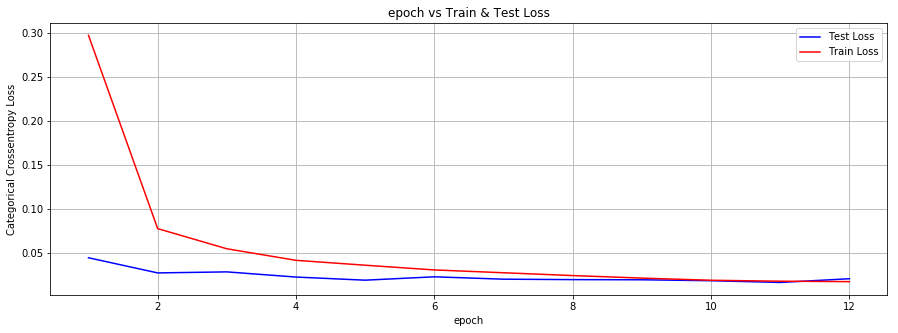

In [50]:
start = datetime.now()

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

print('Time taken to train:',datetime.now()-start)

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),epochs))

total_epochs=list(range(1,epochs+1))
plot_epoch_vs_loss(total_epochs,test_loss,train_loss,colors=['b'])

<h3>3 Conv(5,5) + 2 Max pool + 1 Dense + dropout + Batch Norm</h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 157us/step - loss: 0.2439 - acc: 0.9273 - val_loss: 0.0568 - val_acc: 0.9828
Epoch 2/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0797 - acc: 0.9775 - val_loss: 0.0594 - val_acc: 0.9824
Epoch 3/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0609 - acc: 0.9832 - val_loss: 0.0423 - val_acc: 0.9880
Epoch 4/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0472 - acc: 0.9868 - val_loss: 0.0436 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0392 - acc: 0.9893 - val_loss: 0.0206 - val_acc: 0.9944
Epoch 6/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0339 - acc: 0.9907 - val_loss: 0.0259 - val_acc: 0.9931
Epoch 7/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0298 - acc: 0.9919 - val_loss: 0.0287 - val_ac

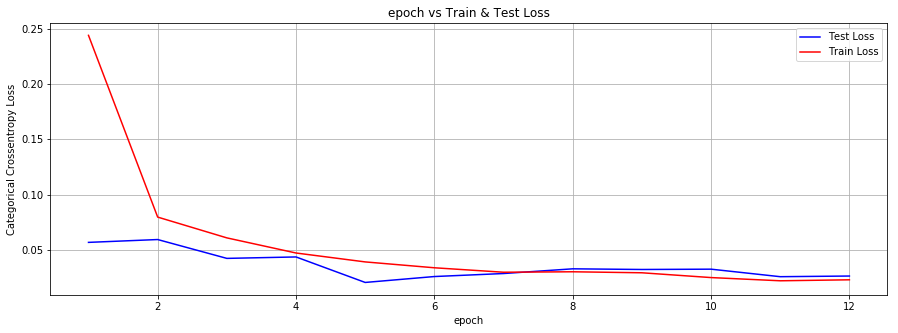

In [73]:
start = datetime.now()

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

print('Time taken to train:',datetime.now()-start)

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),epochs))

total_epochs=list(range(1,epochs+1))
plot_epoch_vs_loss(total_epochs,test_loss,train_loss,colors=['b'])

<h3>3 Conv(5,5) + 2 Max pool + 1 Dense + dropout ,he_normal init, Adam optimizer</h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 116us/step - loss: 0.2921 - acc: 0.9072 - val_loss: 0.0494 - val_acc: 0.9841
Epoch 2/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0828 - acc: 0.9765 - val_loss: 0.0338 - val_acc: 0.9897
Epoch 3/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0628 - acc: 0.9825 - val_loss: 0.0256 - val_acc: 0.9917
Epoch 4/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0470 - acc: 0.9862 - val_loss: 0.0240 - val_acc: 0.9927
Epoch 5/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0392 - acc: 0.9888 - val_loss: 0.0299 - val_acc: 0.9906
Epoch 6/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0340 - acc: 0.9899 - val_loss: 0.0258 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0321 - acc: 0.9912 - val_loss: 0.0217 - val_ac

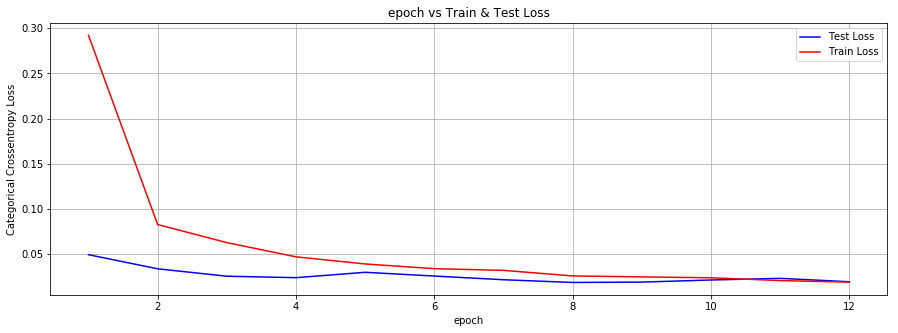

In [65]:
start = datetime.now()

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',
                 kernel_initializer='he_normal',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

print('Time taken to train:',datetime.now()-start)

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),epochs))

total_epochs=list(range(1,epochs+1))
plot_epoch_vs_loss(total_epochs,test_loss,train_loss,colors=['b'])

<h3>5 Conv(2,2) + 2 Max pool + 2 Dense + dropout</h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 209us/step - loss: 0.3917 - acc: 0.8729 - val_loss: 0.0582 - val_acc: 0.9829
Epoch 2/12
60000/60000 [==============================] - 9s 143us/step - loss: 0.0985 - acc: 0.9726 - val_loss: 0.0364 - val_acc: 0.9893
Epoch 3/12
60000/60000 [==============================] - 9s 143us/step - loss: 0.0743 - acc: 0.9798 - val_loss: 0.0317 - val_acc: 0.9907
Epoch 4/12
60000/60000 [==============================] - 9s 143us/step - loss: 0.0590 - acc: 0.9841 - val_loss: 0.0336 - val_acc: 0.9904
Epoch 5/12
60000/60000 [==============================] - 9s 143us/step - loss: 0.0487 - acc: 0.9866 - val_loss: 0.0289 - val_acc: 0.9916
Epoch 6/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0428 - acc: 0.9884 - val_loss: 0.0256 - val_acc: 0.9922
Epoch 7/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0385 - acc: 0.9892 - val_loss: 0.0255 -

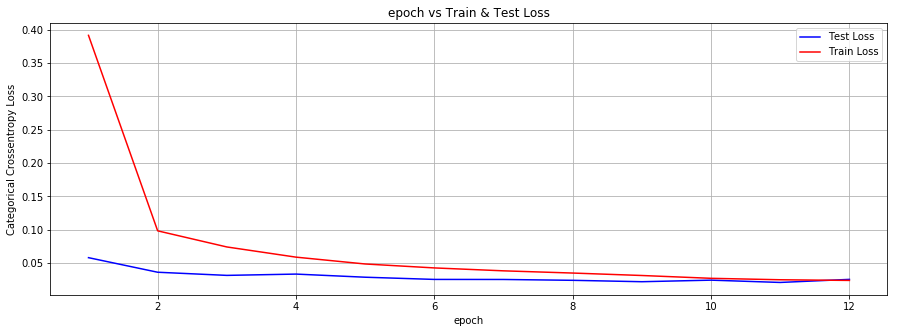

In [67]:
#epochs = 20

start = datetime.now()

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (2, 2), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

print('Time taken to train:',datetime.now()-start)

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),epochs))

total_epochs=list(range(1,epochs+1))
plot_epoch_vs_loss(total_epochs,test_loss,train_loss,colors=['b'])

<h3>5 Conv(2,2) + 2 Max pool + 2 Dense + dropout + Batch Norm</h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 236us/step - loss: 0.2407 - acc: 0.9318 - val_loss: 0.0511 - val_acc: 0.9842
Epoch 2/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0826 - acc: 0.9776 - val_loss: 0.0522 - val_acc: 0.9846
Epoch 3/12
60000/60000 [==============================] - 10s 166us/step - loss: 0.0615 - acc: 0.9841 - val_loss: 0.0364 - val_acc: 0.9905
Epoch 4/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0477 - acc: 0.9866 - val_loss: 0.0321 - val_acc: 0.9910
Epoch 5/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0421 - acc: 0.9890 - val_loss: 0.0250 - val_acc: 0.9925
Epoch 6/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.0360 - acc: 0.9903 - val_loss: 0.0269 - val_acc: 0.9933
Epoch 7/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.0322 - acc: 0.9911 - val_loss: 0.

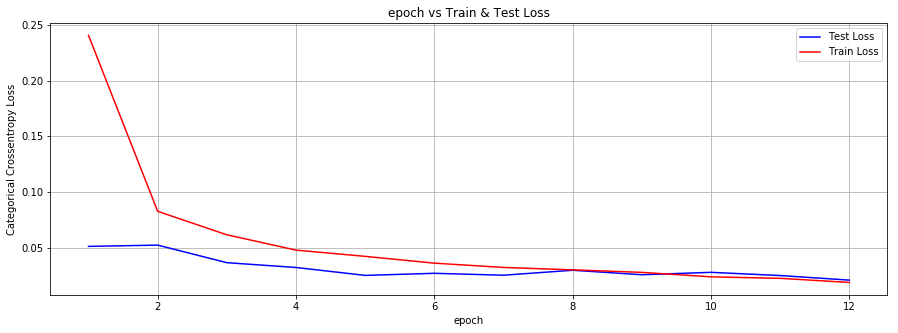

In [72]:
start = datetime.now()

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(512, (2, 2), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

print('Time taken to train:',datetime.now()-start)

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'
      .format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),epochs))

total_epochs=list(range(1,epochs+1))
plot_epoch_vs_loss(total_epochs,test_loss,train_loss,colors=['b'])

In [0]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["# Conv Layers","Kernel Size","# Pool Layers","# Dense Layers",
                 "Dropout","Batch Norm","Train time","Train accuracy(%)","Test accuracy(%)","Model Status"]

x.add_row([2,"(3,3)",1,1,"Yes","No","0:01:02.453771",99.172,99.12,"well-fitted"])
x.add_row([2,"(3,3)",0,1,"Yes","No","0:01:32.559371",99.382,99.05,"tend to overfit"])

x.add_row([3,"(5,5)",0,1,"Yes","No","0:01:58.085707",99.573,99.45,"tend to overfit"])
x.add_row([3,"(5,5)",2,1,"Yes","No","0:00:49.000814",99.505,99.44,"well-fitted"])
x.add_row([3,"(5,5)",2,1,"Yes","Yes","0:01:01.190715",99.415,99.29,"well-fitted"])

x.add_row([5,"(2,2)",2,2,"Yes","No","0:01:49.307987",99.348,99.42,"well-fitted"])
x.add_row([5,"(2,2)",2,2,"Yes","Yes","0:02:06.041622",99.487,99.5,"well-fitted"])


## Overall Observations:

In [80]:
Performance Metrics from Convolutional Neural Networks(CNN) Analysis:

+---------------+-------------+---------------+----------------+---------+------------+----------------+-------------------+------------------+-----------------+
| # Conv Layers | Kernel Size | # Pool Layers | # Dense Layers | Dropout | Batch Norm |   Train time   | Train accuracy(%) | Test accuracy(%) |   Model Status  |
+---------------+-------------+---------------+----------------+---------+------------+----------------+-------------------+------------------+-----------------+
|       2       |    (3,3)    |       1       |       1        |   Yes   |     No     | 0:01:02.453771 |       99.172      |      99.12       |   well-fitted   |
|       2       |    (3,3)    |       0       |       1        |   Yes   |     No     | 0:01:32.559371 |       99.382      |      99.05       | tend to overfit |
|       3       |    (5,5)    |       0       |       1        |   Yes   |     No     | 0:01:58.085707 |       99.573      |      99.45       | tend to overfit |
|       3       |    (5,5)  

1) The CNN's are tend to overfit without a pooling layer in the network.

2) The time complexity is also high without a pooling layer. As pooling layer reduces the parameters, it helps in reducing the time complexity. 

3) There was no significant change in the performance with change in intialization to he_normal & optimizer to Adam.

4) If we leverage small sized kernels like (2,2) either we have to train the model for more no. of epochs or we have to make the network deep by introducing more convolution layers.  

5) The batch normalization layer helps to improve the performance in deep networks. 